In [146]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import sympy as sp

In [147]:
#вариант 11
#Ζ-преобразование

In [148]:
n = sp.symbols('n')
z = sp.symbols('z')

# Выражение для x(n)
x_n = n

# Z-преобразование x(n)
X_z = sp.summation(x_n * z**(-n), (n, 0, sp.oo))
X_z_simplified = sp.simplify(X_z)

print("Z-преобразование x(n):")
print(X_z_simplified)

Z-преобразование x(n):
Piecewise((z/(z - 1)**2, (z > 1) | (z < -1)), (Sum(n/z**n, (n, 0, oo)), True))


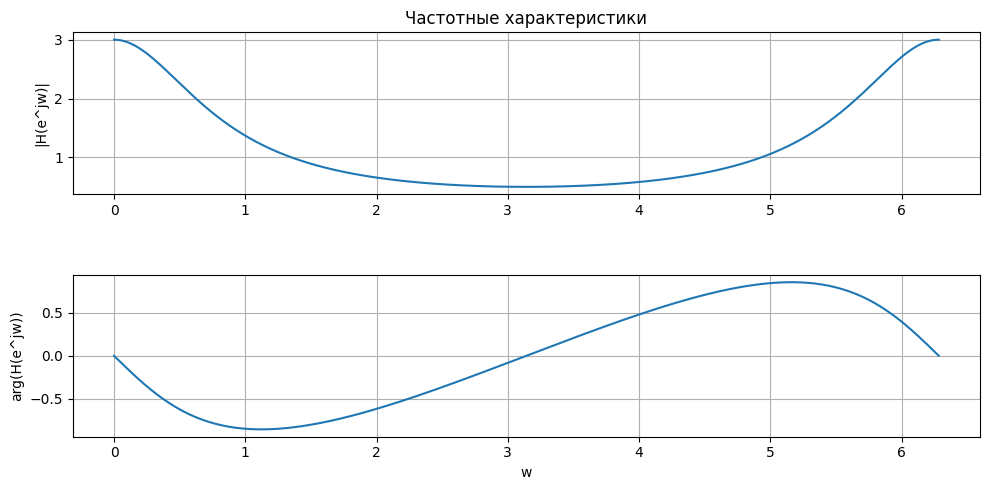

In [149]:
import numpy as np
import matplotlib.pyplot as plt

# Функция передаточной функции H(e^jw)
def H_ejw(w):
    return 1 / (1 - (5/6) * np.exp(-1j * w) + (1/6) * np.exp(-2j * w))

# Диапазон частот
w_values = np.linspace(0, 2 * np.pi, 1000)

# Расчет частотной характеристики |H(e^jw)|
magnitude = np.abs(H_ejw(w_values))

# Расчет аргумента arg(H(e^jw))
phase = np.angle(H_ejw(w_values))

# Построение графика частотной характеристики
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(w_values, magnitude)
plt.title('Частотные характеристики')
plt.xlabel(' ')
plt.ylabel('|H(e^jw)|')
plt.grid()

# Построение графика аргумента
plt.subplot(2, 1, 2)
plt.plot(w_values, phase)
plt.title(' ')
plt.xlabel('w')
plt.ylabel('arg(H(e^jw))')
plt.grid()

plt.tight_layout()
plt.show()


/var/folders/2m/l41vmwc13wv76bnvqy_1q6bh0000gn/T/ipykernel_3402/4150327736.py:19: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n_values, h_n[0], use_line_collection=True)


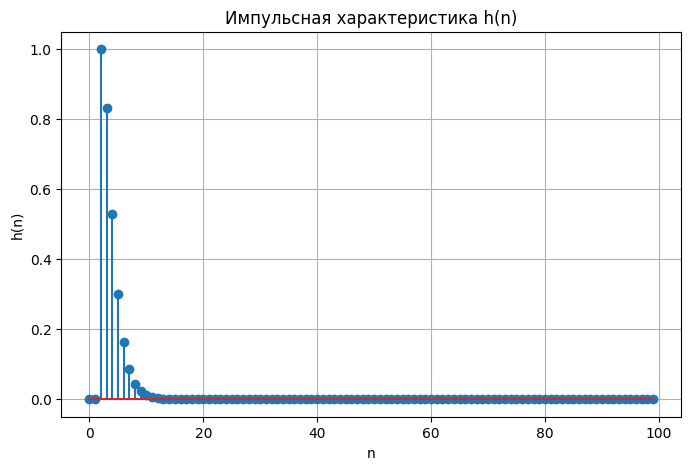

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Функция передаточной функции H(e^jw)
def H_ejw(w):
    return 1 / (1 - (5/6) * np.exp(-1j * w) + (1/6) * np.exp(-2j * w))

# Функция передаточной функции H(z)
def H_z(z):
    return 1 / (1 - (5/6) * z**(-1) + (1/6) * z**(-2))

# Вычисление импульсной характеристики h(n)
impulse_response = signal.dlti([1], [1, -5/6, 1/6])
n_values, h_n = signal.dimpulse(impulse_response, n=100)

# Построение графика импульсной характеристики h(n)
plt.figure(figsize=(8, 5))
plt.stem(n_values, h_n[0], use_line_collection=True)
plt.title('Импульсная характеристика h(n)')
plt.xlabel('n')
plt.ylabel('h(n)')
plt.grid()
plt.show()

In [151]:
n = np.arange(0, 100, 1)
xn = n
w, h = signal.freqz(xn)
arg_H = np.angle(h)

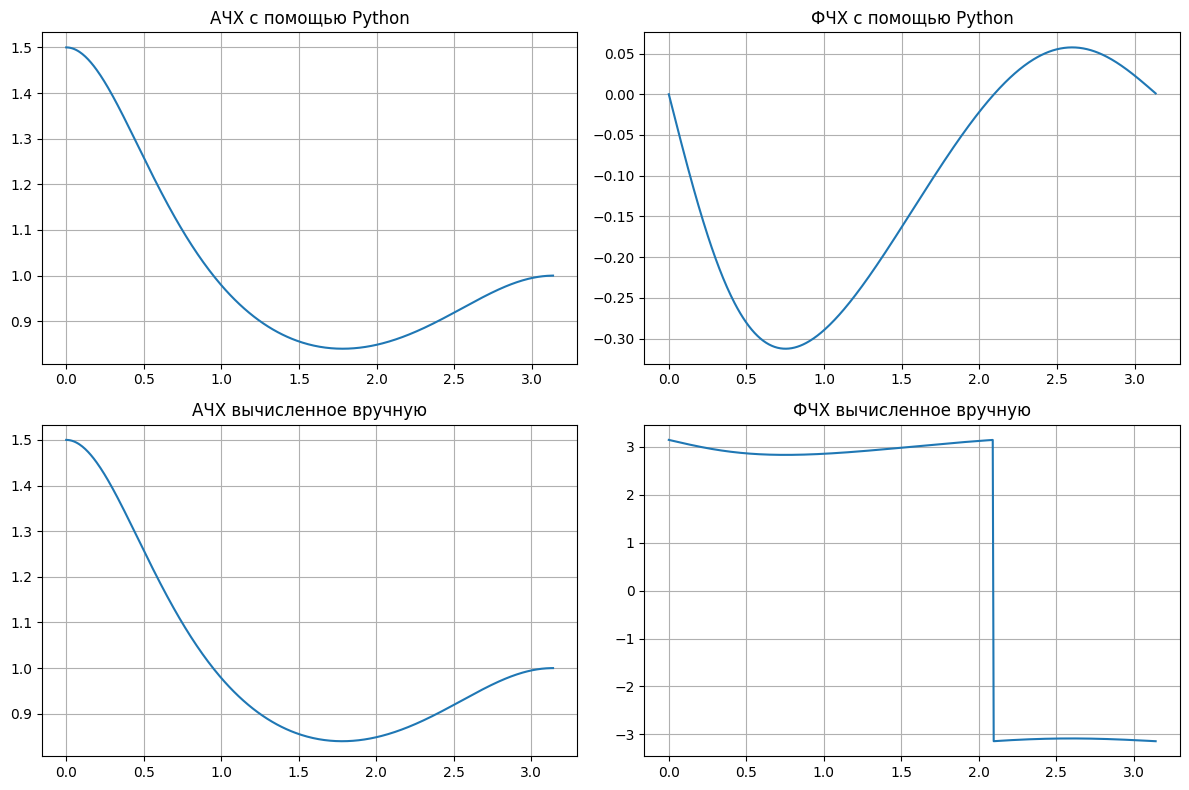

In [152]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(w, A1)
plt.grid(True)
plt.title('АЧХ с помощью Python')

plt.subplot(2, 2, 2)
plt.plot(w, Ph1)
plt.grid(True)
plt.title('ФЧХ с помощью Python')

plt.subplot(2, 2, 3)
plt.plot(w_manual, A2)
plt.grid(True)
plt.title('АЧХ вычисленное вручную')

plt.subplot(2, 2, 4)
plt.plot(w_manual, Ph2)
plt.grid(True)
plt.title('ФЧХ вычисленное вручную')

plt.tight_layout()
plt.show()

In [153]:
def find_zeros(b):
    b0, b1, b2 = b

    discriminant = b1**2 - 4*b0*b2


    if discriminant >= 0:
        z1 = (-b1 + np.sqrt(discriminant)) / (2 * b2)
        z2 = (-b1 - np.sqrt(discriminant)) / (2 * b2)
        return [z1, z2]
    else:

        real_part = -b1 / (2 * b2)
        imag_part = np.sqrt(abs(discriminant)) / (2 * b2)
        z1 = complex(real_part, imag_part)
        z2 = complex(real_part, -imag_part)
        return [z1, z2]

In [154]:
def plot_zeros_poles(b, a):

    z, p, k = signal.tf2zpk(b, a)


    plt.figure(figsize=(8, 6))
    plt.scatter(np.real(z), np.imag(z), marker='o', color='blue', label='Нули')
    plt.scatter(np.real(p), np.imag(p), marker='x', color='red', label='Полюса')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.title('Карта нулей и полюсов')

   
    radius = 1 
    circle = plt.Circle((0, 0), radius, color='gray', fill=False, linestyle='dashed')
    plt.gca().add_patch(circle)


    numerator_zeros = find_zeros(b)
    plt.scatter(np.real(numerator_zeros), np.imag(numerator_zeros), marker='s', color='green', label='Нули (числитель)')

    plt.xlabel('Re')
    plt.ylabel('Im')
    plt.legend()

    if all(np.abs(p) < 1):
        print("Система устойчива.")
    else:
        print("Система неустойчива.")

    plt.show()

    return z, p, k

Система устойчива.


/var/folders/2m/l41vmwc13wv76bnvqy_1q6bh0000gn/T/ipykernel_3402/960092261.py:8: RuntimeWarning: invalid value encountered in scalar divide
  z1 = (-b1 + np.sqrt(discriminant)) / (2 * b2)
/var/folders/2m/l41vmwc13wv76bnvqy_1q6bh0000gn/T/ipykernel_3402/960092261.py:9: RuntimeWarning: invalid value encountered in scalar divide
  z2 = (-b1 - np.sqrt(discriminant)) / (2 * b2)


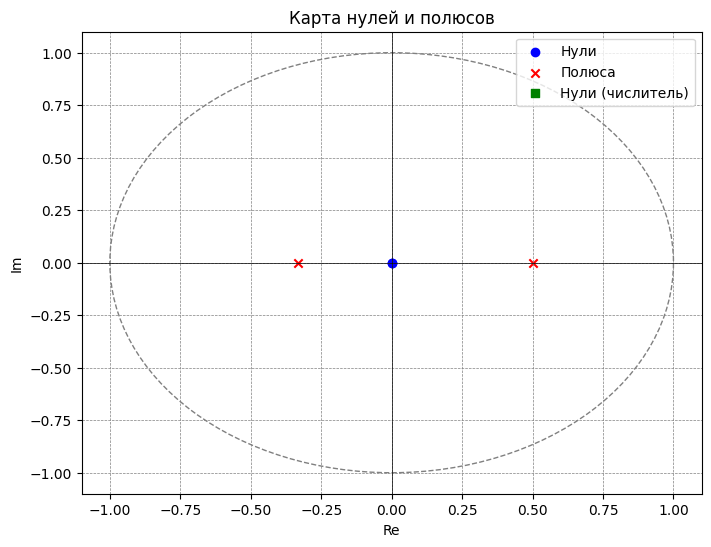

In [155]:
b = [1, 0, 0]
a = [1, -1/6, -1/6]
z, p, k = plot_zeros_poles(b, a)